In [ ]:
import sys, csv
import pandas as pd
csv.field_size_limit(sys.maxsize)
usecols = [
    "filename","MI_Before","MI_After","CC_Change","MI_Change",
    "LOC_Change","Semantic_Similarity","Token_Similarity",
    "Semantic_Class","Token_Class","Classes_Agree"
]
df = pd.read_csv(
    "diff_rectified_with_metrics.csv",
    engine="python",
    usecols=usecols,
    on_bad_lines="skip"
)

  filename                      MI_Before   MI_After    MI_Change  CC_Change  LOC_Change  Semantic_Similarity  Token_Similarity Semantic_Class Token_Class Classes_Agree
0             api_requestor.py   29.348725   29.348725  0.000000    0.0        0.0        1.000000             0.996093          Minor          Minor       YES         
1                  __init__.py  100.000000  100.000000  0.000000    0.0        1.0        0.999268             0.899845          Minor          Minor       YES         
2                    answer.py         NaN   73.041182       NaN    NaN        NaN             NaN                  NaN            NaN            NaN       NaN         
3            classification.py         NaN   73.041182       NaN    NaN        NaN             NaN                  NaN            NaN            NaN       NaN         
4                      file.py   67.472677   67.472677  0.000000    0.0       -2.0        0.999635             0.970930          Minor          Minor      

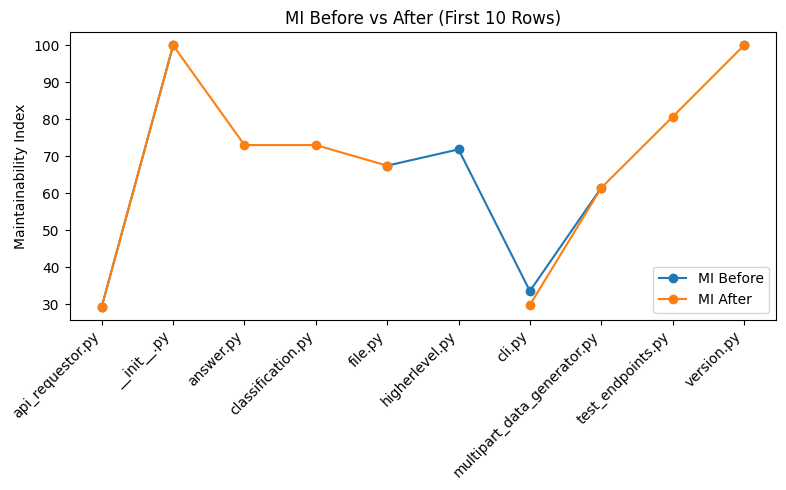

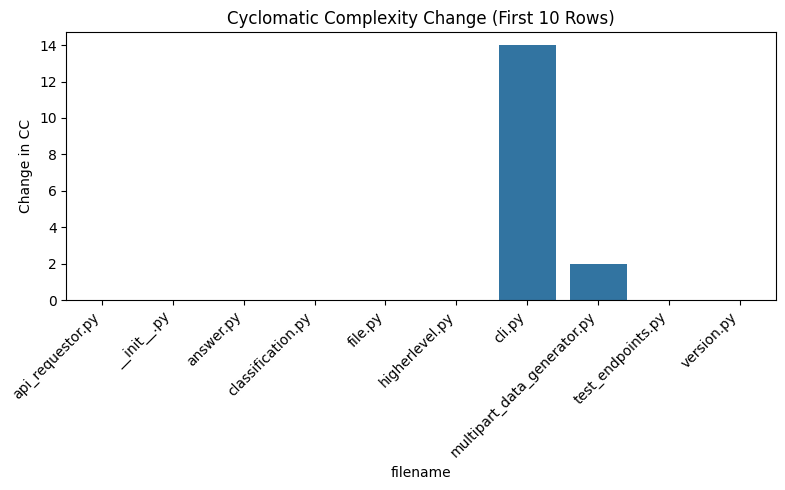

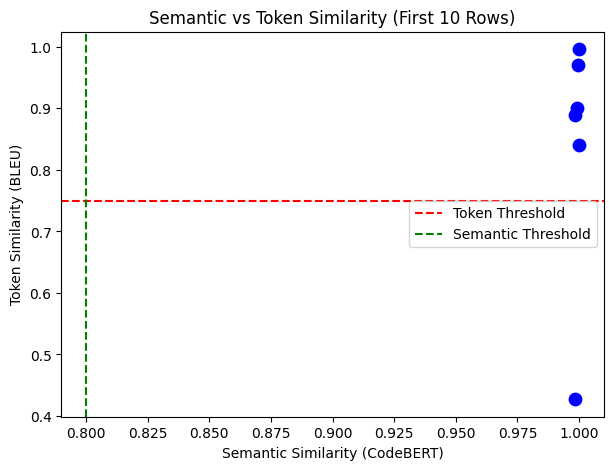

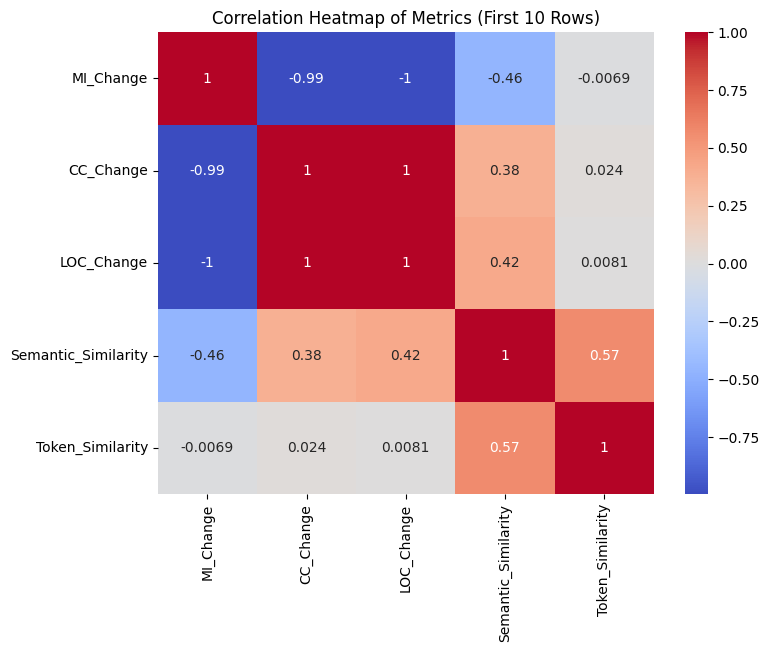

In [ ]:
df10 = df.head(10)
print(df10)

plt.figure(figsize=(8,5))
x = range(len(df10))
plt.plot(x, df10["MI_Before"], marker="o", label="MI Before")
plt.plot(x, df10["MI_After"], marker="o", label="MI After")
plt.xticks(x, df10["filename"], rotation=45, ha="right")
plt.ylabel("Maintainability Index")
plt.title("MI Before vs After (First 10 Rows)")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x=df10["filename"], y=df10["CC_Change"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Change in CC")
plt.title("Cyclomatic Complexity Change (First 10 Rows)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,5))
plt.scatter(df10["Semantic_Similarity"], df10["Token_Similarity"], c="blue", s=80)
plt.xlabel("Semantic Similarity (CodeBERT)")
plt.ylabel("Token Similarity (BLEU)")
plt.title("Semantic vs Token Similarity (First 10 Rows)")
plt.axhline(0.75, color="red", linestyle="--", label="Token Threshold")
plt.axvline(0.80, color="green", linestyle="--", label="Semantic Threshold")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
metrics = df10[["MI_Change","CC_Change","LOC_Change","Semantic_Similarity","Token_Similarity"]]
sns.heatmap(metrics.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Metrics (First 10 Rows)")
plt.show()